In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pre_workshop = Path.cwd() / "data" / "pre_workshop_survey.csv"
df = pd.read_csv(pre_workshop)

In [3]:
image_dir = Path.cwd() / "images"
image_dir.mkdir(exist_ok=True)

In [4]:
df.columns

Index(['Submitter', 'Submitter Email', 'Submission Date',
       'Biographical: What area of research do you work in?',
       'Biographical: What career stage are you?',
       'Biographical: Describe your role in your research group related to software',
       'Biographical: What are your motivations for participating in this workshop?',
       'Biographical: What do you hope to gain from this worksop?',
       'Biographical: Is there a research project that you hope to apply this workshop information to?',
       'Biographical: What is your idea of "reproducible research"?',
       'Biographical: Have you ever used a lock file for research before?',
       'Biographical: What is your gender identity?',
       'Biographical: What ethnicity do you identify with?',
       'Biographical: How did you learn about this workshop?',
       'Biographical: Additional context on how you learned about the workshop',
       'Tools: What operating system does your computer for this workshop use?'

In [5]:
pd.set_option('display.max_colwidth', 100)
df["Biographical: What area of research do you work in?"]

0                                                         Public health; Maternal and child health; Omics
1                                                                                          Bioinformatics
2                                                                                    Earth system Science
3                                                                Ollama Models and other topics on my own
4                                                                                          multiple areas
5                                                                                            data science
6                                                                 chemical engineering, materials science
7                                                                                              ethical AI
8                                                                                        computer science
9                                             

In [6]:
def categorize_research_area(text):
    if pd.isna(text):
        return "Unknown"
    
    text = text.lower()
    
    # Define category keywords
    if any(word in text for word in ['public health']):
        return "Public Health"
    elif any(word in text for word in ['bioinformatics']):
        return "Bioinformatics"
    elif any(word in text for word in ['earth', 'climate']):
        return "Earth Science"
    elif any(word in text for word in ['machine learning', ' ml', ' ai', 'data science', 'ollama', 'hcai']):
        return "Data Science and AI/ML"
    elif any(word in text for word in ['computer science']):
        return "Computer Science"
    elif any(word in text for word in ['chemical engineering']):
        return "Chemical Engineering"
    elif any(word in text for word in ['electrical engineering']):
        return "Electrical Engineering"
    elif any(word in text for word in ['business', 'product development']):
        return "Industry / Buisness"
    elif any(word in text for word in ['neuroscience', 'biochemistry']):
        return "Life Sciences"
    elif any(word in text for word in ['physics']):
        return "Physics"
    elif any(word in text for word in ['fusion', 'nuclear', 'neutronics']):
        return "Nuclear Science"
    elif any(word in text for word in ['linguistics']):
        return "Linguistics"
    elif any(word in text for word in ['economics', 'business', 'product', 'tax']):
        return "Business/Economics"
    else:
        return "Other"

df["research_area"] = df["Biographical: What area of research do you work in?"].apply(categorize_research_area)

In [7]:
df["research_area"]

0              Public Health
1             Bioinformatics
2              Earth Science
3     Data Science and AI/ML
4                      Other
5     Data Science and AI/ML
6       Chemical Engineering
7     Data Science and AI/ML
8           Computer Science
9       Chemical Engineering
10       Industry / Buisness
11          Computer Science
12      Chemical Engineering
13               Linguistics
14    Data Science and AI/ML
15          Computer Science
16    Data Science and AI/ML
17    Data Science and AI/ML
18    Data Science and AI/ML
19           Nuclear Science
20       Industry / Buisness
21          Computer Science
22           Nuclear Science
23    Data Science and AI/ML
24             Life Sciences
25             Life Sciences
26    Data Science and AI/ML
27    Data Science and AI/ML
Name: research_area, dtype: object

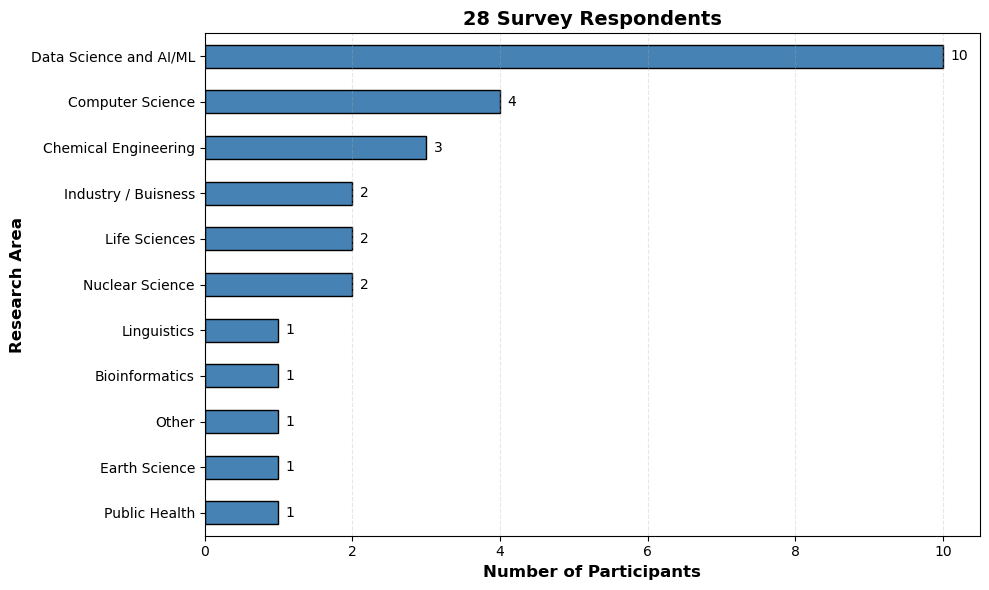

In [8]:
import matplotlib.pyplot as plt

# Count the values and sort by frequency
research_counts = df["research_area"].value_counts().sort_values()

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
research_counts.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')

# Customize the plot
ax.set_xlabel('Number of Participants', fontsize=12, fontweight="bold")
ax.set_ylabel('Research Area', fontsize=12, fontweight="bold")
ax.set_title(f'{len(df)} Survey Respondents', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add count labels on the bars
for i, (index, value) in enumerate(research_counts.items()):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)

fig.tight_layout()

fig.savefig(image_dir / "participant_research_areas.png", dpi=300)